# Zhenlong Li (zl51)
## IE598 MLF F18
### Module 7 Homework (Random Forest)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

Using Wine dataset (from Chapter 4), 10% test set holdout and 10 fold cross validation

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/' 'ml/machine-learning-databases/' 'wine/wine.data', header=None)
df_wine.columns = ['Class label',
                   'Alcohol',
                   'Malic acid',
                   'Ash',
                   'Alcalinity of ash',
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))

df_wine.head()

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=0)

Class labels [1 2 3]


## Part 1: Random forest estimators

Fit a random forest model, try several different values for N_estimators, report in-sample accuracies.

In [7]:
n_range = [25, 100, 500, 1000, 5000, 10000]
insample_scores = []
cv_scores = []

for n in n_range:
    forest = RandomForestClassifier(criterion='gini',
                           n_estimators=n,
                           random_state=1,
                           n_jobs=2)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_pred = forest.predict(X_test)
    insample_scores.append(metrics.accuracy_score(y_train, y_train_pred))
    
i = 0
while i < len(n_range):
    print("N_estimators =", n_range[i], "", 'Accuracy score of in-sample: %.3f' % insample_scores[i])
    i += 1
print("in-sample mean: %.3f" % np.mean(insample_scores),
      "standard deviation: %.3f" % np.std(insample_scores))

N_estimators = 25  Accuracy score of in-sample: 1.000
N_estimators = 100  Accuracy score of in-sample: 1.000
N_estimators = 500  Accuracy score of in-sample: 1.000
N_estimators = 1000  Accuracy score of in-sample: 1.000
N_estimators = 5000  Accuracy score of in-sample: 1.000
N_estimators = 10000  Accuracy score of in-sample: 1.000
in-sample mean: 1.000 standard deviation: 0.000


In [4]:
scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=10, n_jobs=1)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.94444444 1.         0.94444444 0.9375     1.         1.
 1.         1.         1.         1.        ]
CV accuracy: 0.983 +/- 0.027


## Part 2: Random forest feature importance

Display the individual feature importance of your best model in Part 1 above using the code presented in Chapter 4 on page 136. {importances=forest.feature_importances_ }

 1) Color intensity                0.163772
 2) Proline                        0.158557
 3) Flavanoids                     0.151469
 4) OD280/OD315 of diluted wines   0.135233
 5) Alcohol                        0.125926
 6) Hue                            0.069534
 7) Total phenols                  0.053744
 8) Alcalinity of ash              0.032523
 9) Malic acid                     0.028273
10) Magnesium                      0.025895
11) Proanthocyanins                0.025062
12) Ash                            0.015919
13) Nonflavanoid phenols           0.014093


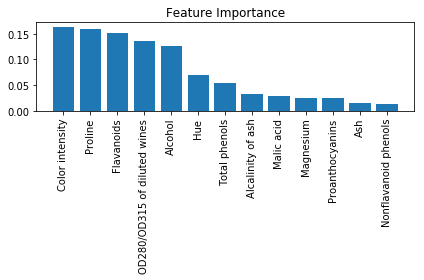

In [5]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [6]:
print("My name is Zhenlong Li")
print("My NetID is: zl51")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zhenlong Li
My NetID is: zl51
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


## Part 3: Conclusions

Write a short paragraph summarizing your findings. What is the relationship between n_estimators, in-sample CV accuracy and computation time?  What is the optimal number of estimators for your forest?  Which features contribute the most importance in your model according to scikit-learn function?  What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-Learn.org documentation.)

The more n_estimators we set, the more computation time we will have to wait and the more accurate CV score we will have. The optimal number of estimators is 500 and "Color intensity" contribute the most importance in my model.
According to Scikit-Learn.org documentation, the relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

## Part 4: Appendix

Link to github repo:
    https://github.com/zhli3378/IE598_Machine_Learning_in_Fin_Lab/blob/master/IE598_F18_HW7/IE598_F18_HW7.ipynb